# Scipy

SciPy is a collection of mathematical algorithms and convenience functions built on Numpy. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment at par with sytems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

SciPy is organized into subpackages covering different scientific computing domains. These are:

* cluster - Clustering algorithms
* constants - Physical and mathematical constants
* fftpack - Fast Fourier Transform routines
* integrate - Integration and ordinary differential equation solvers
* interpolate - Interpolation and smoothing splines
* io - Input and Output
* linalg - Linear algebra
* ndimage - N-dimensional image processing
* odr - Orthogonal distance regression
* optimize - Optimization and root-finding routines
* signal - Signal processing
* sparse - Sparse matrices and associated routines
* spatial - Spatial data structures and algorithms
* special - Special functions
* stats - Statistical distributions and functions
* weave - C/C++ integration

Each of the Scipy sub-packages needs to be imported separately

In [ ]:
from scipy import linalg
from scipy import stats

In [ ]:
from scipy import misc  # miscelaneous simple functions

In [ ]:
misc.factorial(100)

In [ ]:
misc.comb(10, 2)  # number of combinations of N things taken k at a time (N choose k)

## Special functions (scipy.special)

The main feature of the scipy.special package is the definition of numerous special functions of mathematical physics. Available functions include airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, and kelvin.

In [ ]:
from scipy import special

In [ ]:
dir(special)

Example of Bessel functions: vibrational modes of a thin circular drum head anchored at the edge

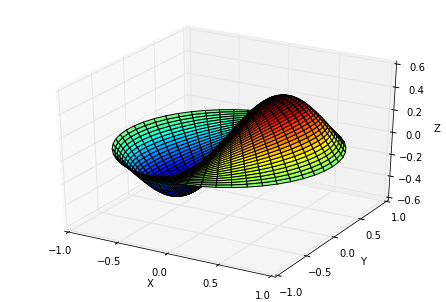

In [6]:
from scipy.special import jn, jn_zeros
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def drumhead_height(n, k, distance, angle, t):
   nth_zero = jn_zeros(n, k)
   return np.cos(t) * np.cos(n*angle) * jn(n, distance*nth_zero)

theta = np.r_[0:2*pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r*np.cos(theta) for r in radius])
y = np.array([r*np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Integration (scipy.integrate)

In [7]:
from scipy.integrate import quad

In [8]:
quad?

Calculate the exponential integral for integer n and non-negative x, n

$$E_n (x) = \int_1^{\infty} \frac{e^{-xt}}{t^n} dt$$

In [9]:
def integrand(t, n, x):
    return exp(-x*t) / t**n

quad(integrand, 1, Inf, args=(4, 0.5))[0]

0.1652428258583478

In [11]:
# note that there is already a function for this
from scipy.special import expn
expn(4, 0.5)

0.16524282585834807

In [13]:
a = quad(integrand, 1, Inf, args=(4, 0.5))[0]
b = expn(4, 0.5)
np.allclose(a, b)

True

## Optimization (scipy.optimize)

See all the methods here https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html

In [16]:
from scipy.optimize import minimize, rosen

x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res.x

array([ 1.00000002,  1.00000002,  1.00000007,  1.00000015,  1.00000028])

## Interpolation (scipy.interpolate)

All methods here https://docs.scipy.org/doc/scipy-0.18.1/reference/interpolate.html

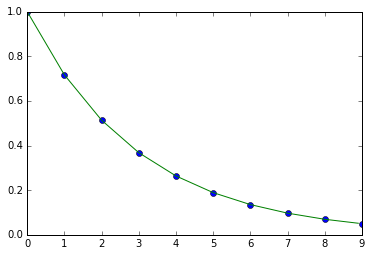

In [17]:
from scipy import interpolate

x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.figure()
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Fourier Transforms (scipy.fftpack)

## Signal Processing (scipy.signal)

## Linear Algebra (scipy.linalg)

See methods at https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html  

Note that `numpy.linalg` has mostly the same functionality.

## Spatial data structures and algorithms (scipy.spatial)

## Statistics (scipy.stats)

### Random variables

There are two distribution classes for continuous random variables and discrete random variables.  
Over 80 continuous random variables (RVs) and 10 discrete random variables have been implemented using these classes.

The main methods for continuous RVs are:

* `rvs`: Random Variates
* `pdf`: Probability Density Function
* `cdf`: Cumulative Distribution Function
* `sf`: Survival Function (1-CDF)
* `ppf`: Percent Point Function (Inverse of CDF)
* `isf`: Inverse Survival Function (Inverse of SF)
* `stats`: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* `moment`: non-central moments of the distribution

In [32]:
from scipy import stats
from scipy.stats import norm  # the normal, or Gaussian, distribution

In [22]:
# by default, norm is the standard normal distribution
norm.cdf(0)

0.5

In [23]:
norm.mean(), norm.std(), norm.var()

(0.0, 1.0, 1.0)

To generate a set of random variables from the normal distribution

In [24]:
norm.rvs(size=5)

array([-0.12842265, -0.14635958,  0.69923419, -3.23179799, -0.83393146])

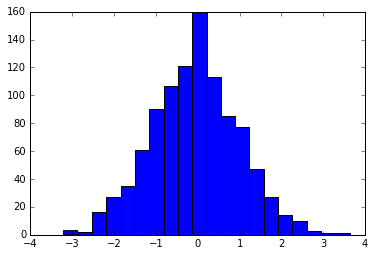

In [29]:
h = plt.hist(norm.rvs(size=1000), bins=20)

All continuous distributions take `loc` and `scale` as keyword parameters to adjust the location and scale of the distribution, e.g. for the standard normal distribution the location is the mean and the scale is the standard deviation.

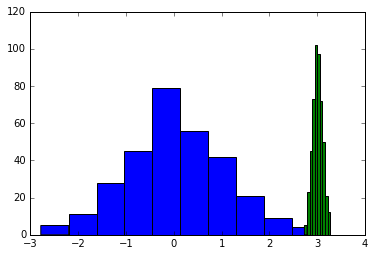

In [30]:
x = norm.rvs(size=300)
y = norm.rvs(loc=3, scale=0.1, size=500)

plt.figure()
n, bins, p = plt.hist(x)
n, bins, p = plt.hist(y)
plt.show()

### Statistical tests

In [33]:
x = stats.t.rvs(10, size=10000)  # we set the degrees of freedom of the t distribution to 10

Sample descriptive statistics

In [34]:
ss = stats.describe(x) 
ss  # this contains N, min, max, mean, variance, skewness, kurtosis

DescribeResult(nobs=10000, minmax=(-6.4027786419266635, 6.9607347639616481), mean=0.018406593594095785, variance=1.2184181327374473, skewness=0.06231137329780537, kurtosis=0.9457499419728976)

In [37]:
print 'KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x, 't', (10,))

KS-statistic D =  0.009 pvalue = 0.3317


Kolmogorov-Smirnov test for two samples

In [38]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs3 = stats.norm.rvs(loc=8, scale=10, size=500)  # different mean

In [39]:
stats.ks_2samp(rvs1, rvs2)  # cannot reject the null hypothesis since the pvalue is high

Ks_2sampResult(statistic=0.056000000000000036, pvalue=0.40310260702007894)

In [40]:
stats.ks_2samp(rvs1, rvs3)  # can reject the null hypothesis since the pvalue is below 1%

Ks_2sampResult(statistic=0.12600000000000008, pvalue=0.00062808163421954315)

### Kernel Density Estimation

A common task in statistics is to estimate the probability density function (PDF) of a random variable from a set of data samples. This task is called density estimation. The most well-known tool to do this is the histogram. A histogram is a useful tool for visualization, but doesn’t use the available data very efficiently. Kernel density estimation (KDE) is a more efficient tool for the same task. The `gaussian_kde` estimator can be used to estimate the PDF of univariate as well as multivariate data. It works best if the data is unimodal.

In [41]:
x1 = np.random.normal(size=100)  # random data, normal distribution
kde1 = stats.gaussian_kde(x1)

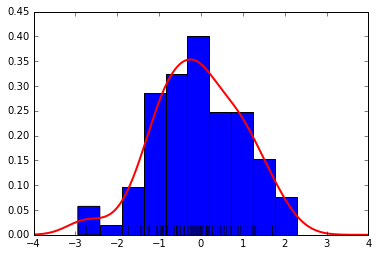

In [42]:
plt.figure()
p = plt.plot(x1, np.zeros(x1.shape), 'k+', ms=20)  # rug plot
p = plt.hist(x1, normed=True)  # histogram

x_eval = np.linspace(-4, 4, 200)
plt.plot(x_eval, kde1(x_eval), 'r-', lw=2)  # kde

`gaussian_kde` can perform multivariate as well as univariate estimation. Let's do the bivariate case. 

For that we generate some random data with a model in which the two variates are correlated.

In [43]:
def measure(n):
    """Return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

# apply the KDE to the data:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

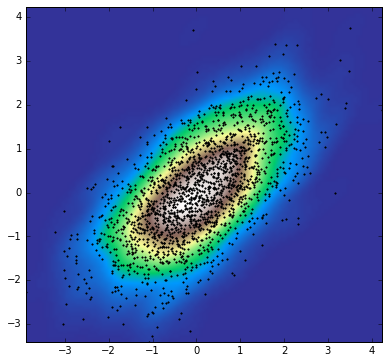

In [44]:
# plot the estimated bivariate distribution as a colormap, and plot the individual data points on top.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.terrain,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=3)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

## Multidimensional image processing (scipy.ndimage)

## File IO (scipy.io)

## Weave (scipy.weave)

In [45]:
# this does not work in the notebook but gives a quick way to use C/C++ code within Python
from scipy import weave
a = 1
weave.inline(r'printf("%d\\n",a);',['a'])

#### Advanced

This example solves Laplace's equation over a 2-d rectangular grid using a simple iterative method. The code finds a two-dimensional function, `u`, where `∇^2 u = 0`, given some fixed boundary conditions.
We compare implementations in pure Python, numpy and using C/weave

In [46]:
dx = 0.1
dy = 0.1
dx2 = dx*dx
dy2 = dy*dy


def py_update(u):
    nx, ny = u.shape
    for i in xrange(1,nx-1):
        for j in xrange(1, ny-1):
            u[i,j] = ((u[i+1, j] + u[i-1, j]) * dy2 +
                      (u[i, j+1] + u[i, j-1]) * dx2) / (2*(dx2+dy2))


def numpy_update(u):
    u[1:-1,1:-1] = ((u[2:,1:-1]+u[:-2,1:-1])*dy2 + 
                    (u[1:-1,2:] + u[1:-1,:-2])*dx2) / (2*(dx2+dy2))


def weave_update(u):
    code = """
    int i, j;
    for (i=1; i<Nu[0]-1; i++) {
       for (j=1; j<Nu[1]-1; j++) {
           U2(i,j) = ((U2(i+1, j) + U2(i-1, j))*dy2 + \
                       (U2(i, j+1) + U2(i, j-1))*dx2) / (2*(dx2+dy2));
       }
    }
    """
    weave.inline(code, ['u', 'dx2', 'dy2'])


def calc(N, Niter=10000, func=py_update, args=()):
    u = zeros([N, N])
    u[0] = 1
    for i in range(Niter):
        func(u,*args)
    return u

In [47]:
N = 15   # NxN grid  (above N=15 might take a long time to run)

In [48]:
print 'Time for pure Python'
u1 = calc(N, func=py_update)
py_result = %timeit -o calc(N, func=py_update)

Time for pure Python
1 loops, best of 3: 1.85 s per loop


In [49]:
print 'Time for Numpy'
u2 = calc(N, func=numpy_update)
numpy_result = %timeit -o calc(N, func=numpy_update)

Time for Numpy
10 loops, best of 3: 94.9 ms per loop


In [50]:
print 'Time for weave'
u3 = calc(N, func=weave_update)
weave_result = %timeit -o calc(N, func=weave_update)

Time for weave
10 loops, best of 3: 24.4 ms per loop


In [51]:
print np.allclose(u1, u2), np.allclose(u1, u3)

True True


In [52]:
speedups = py_result.best / numpy_result.best, numpy_result.best / weave_result.best
print 'The speedup going from pure Python to numpy is %dx' % speedups[0]
print 'but C/weave still provides a %dx speedup on top of that' % speedups[1]

The speedup going from pure Python to numpy is 19x
but C/weave still provides a 3x speedup on top of that


In [53]:
speedups

(19.456777789832362, 3.8949221776181417)